# Introduction to ipywidgets

Widgets are 'eventful' python objects that are represented within a Jupyter notebook.  'Eventful' just means that a user can interact with these objects, in the form of sliders, textboxes, and checkboxes.  

For example, in this tutorial we will use widgets to make an interactive graph, allowing the user to see how a function / result depends on various parameters.  If you want to learn more, check out the [ipywidgets User Guide](https://ipywidgets.readthedocs.io/en/latest/user_guide.html).

## 0. Import Numpy, Matplotlib, and ipywidgets

In [18]:
import numpy as np
import matplotlib.pyplot as plt
#from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
%matplotlib notebook

## 1. Our first widgets

### FloatSlider

In [27]:
widgets.FloatSlider(
    min=0.2, 
    max=5.1, 
    step=0.2, 
    value=1, 
    description=r'$\omega$')

FloatSlider(value=1.0, description='$\\omega$', max=5.1, min=0.2, step=0.2)

Here are some other noteworthy widgets. (The full list can be found in the [User Guide](https://ipywidgets.readthedocs.io/en/latest/examples/Widget%20List.html).)
* Numeric
    * FloatSlider
    * IntSlider
    * IntRangeSlider
    * BoundedIntText
* Boolean
    * ToggleButton
    * Checkbox
* Selection
    * Dropdown
    * RadioButtons
    * Select
* String
    * Text
    * Button
* Etc ...

### Dropdown

In [29]:
widgets.Dropdown(
    options=['1', '2', '3'],
    value='2',
    description='Number:',
    disabled=True,
)

Dropdown(description='Number:', disabled=True, index=1, options=('1', '2', '3'), value='2')

## 2. Alternative way to display the widget

In [30]:
from IPython.display import display
w = widgets.IntSlider(description=r'$N$')
display(w)

IntSlider(value=0, description='$N$')

In [31]:
#print(w.__attr__)
print(w.keys)
w.orientation = 'vertical'
w.min = -100

['_dom_classes', '_model_module', '_model_module_version', '_model_name', '_view_count', '_view_module', '_view_module_version', '_view_name', 'continuous_update', 'description', 'disabled', 'layout', 'max', 'min', 'orientation', 'readout', 'readout_format', 'step', 'style', 'value']


In [32]:
w.orientation = 'horizontal'

In [33]:
display(w)

IntSlider(value=-100, description='$N$', min=-100)

In [34]:
w.close()

## 3. ipywidgets.interact() function: Making widgets useful
Widgets become useful when their parameters can be fed into functions, and the results displayed in real time.  This is what the `interact()` function can do.

In [12]:
from ipywidgets import interact

### Simple $f(x)$ - Just print $x$

In [35]:
def f(x):
    print("x=",x,", x^2=",x**2)

### Hook up a widget to $f(x)$ - Long Way

In [37]:
interact(f, x=widgets.IntSlider(min=-10, max=10, description=r'$x$'))

interactive(children=(IntSlider(value=0, description='$x$', max=10, min=-10), Output()), _dom_classes=('widget…

<function __main__.f>

### Hook up a widget to $f(x)$ - Abbreviated Way

In [39]:
interact(f, x=10)

interactive(children=(IntSlider(value=10, description='x', max=30, min=-10), Output()), _dom_classes=('widget-…

<function __main__.f>

## 4. Making an Interactive Graph: $ax^2+bx+c$

In [40]:
def fnc(x,a,b,c):
    return a*x**2+b*x+c

def d_fnc(x,a,b):
    return 2*a*x+b

### Static Plot First

<IPython.core.display.Javascript object>


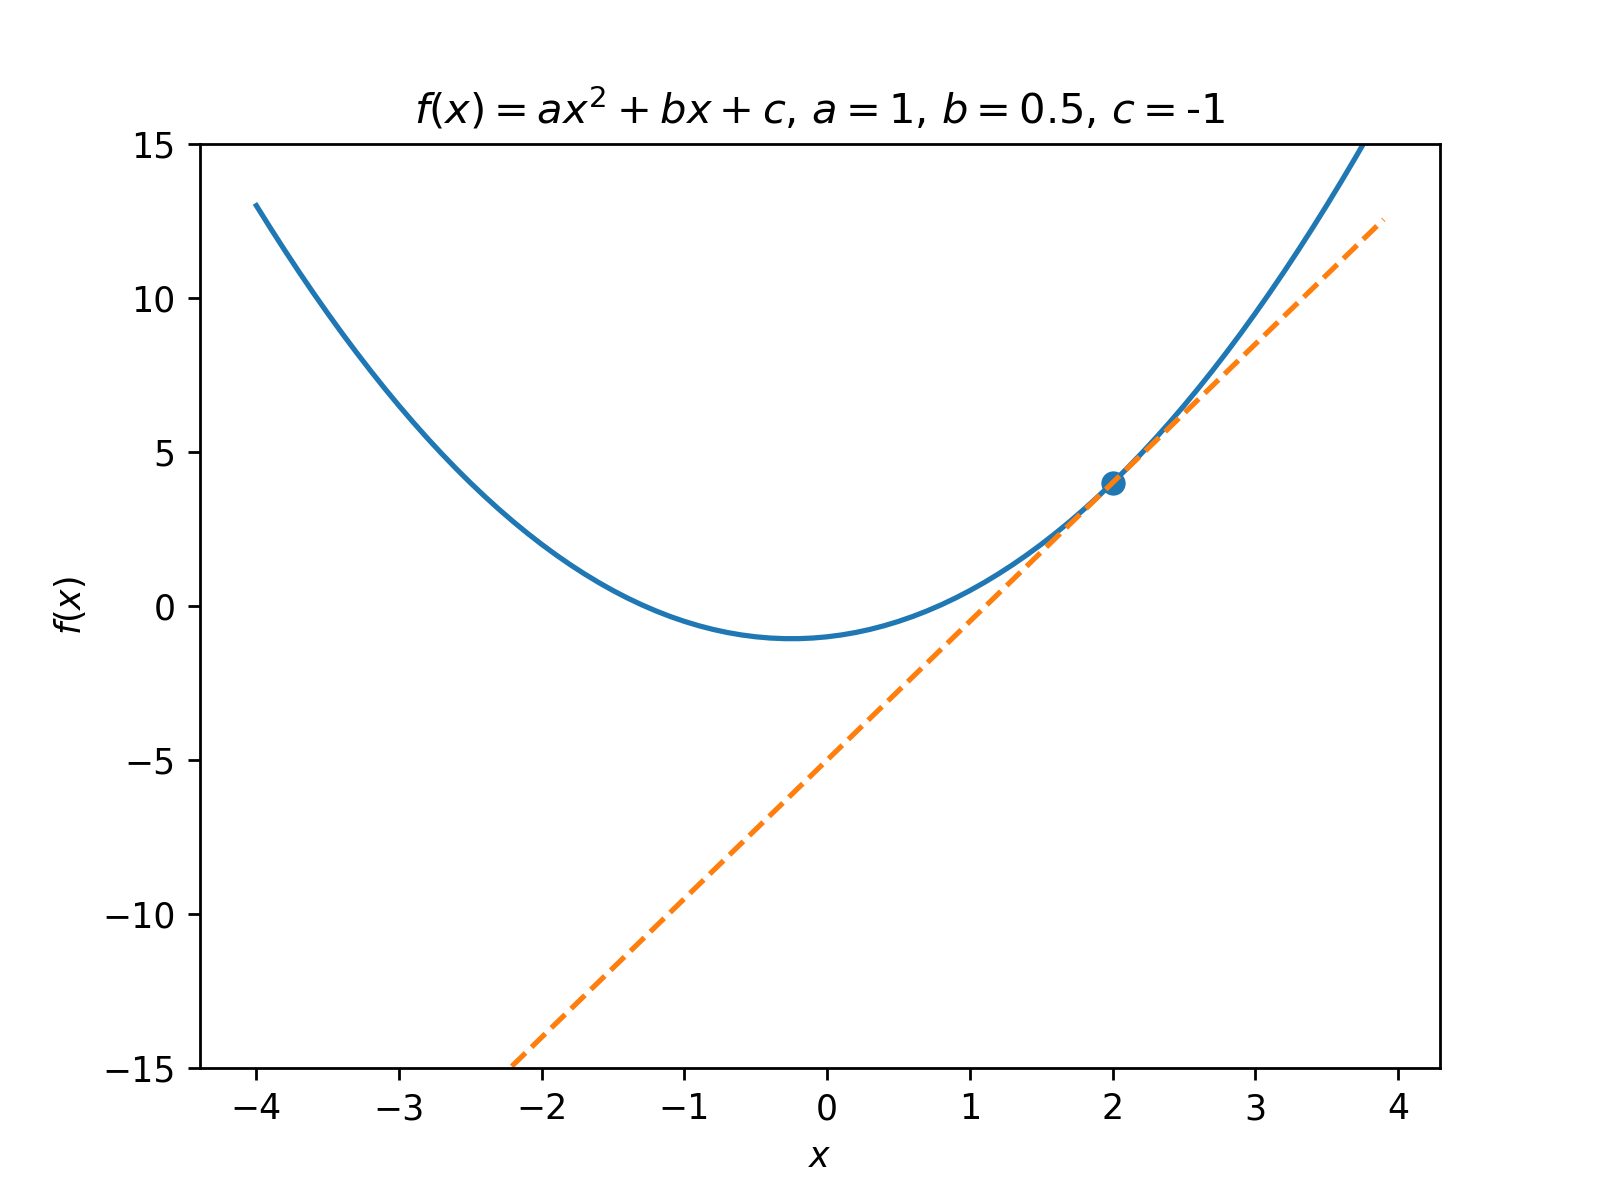

In [42]:
x_min = -4
x_max = 4
dx = 0.1
x = np.arange(x_min, x_max, dx)

a=1
b=0.5
c=-1

x_tangent = 2                    # Where do we want the tangent line?
d_f = d_fnc(x_tangent, a, b)     # What is the slope at x_tangent?

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(x, fnc(x,a,b,c))                                      # Plot the curve
ax.scatter([x_tangent], [fnc(x_tangent,a,b,c)])               # Mark the point where we are getting the tangent line
ax.plot(x, d_f*(x-x_tangent)+fnc(x_tangent,a,b,c), '--')      # Draw the tangent line through x_tangent

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title(r'$f(x)=ax^2+bx+c$, $a=$'+str(a)+r', $b=$'+str(b)+', $c=$'+str(c))
plt.ylim([-15,15])
plt.show()

### Interactive Plot

<IPython.core.display.Javascript object>


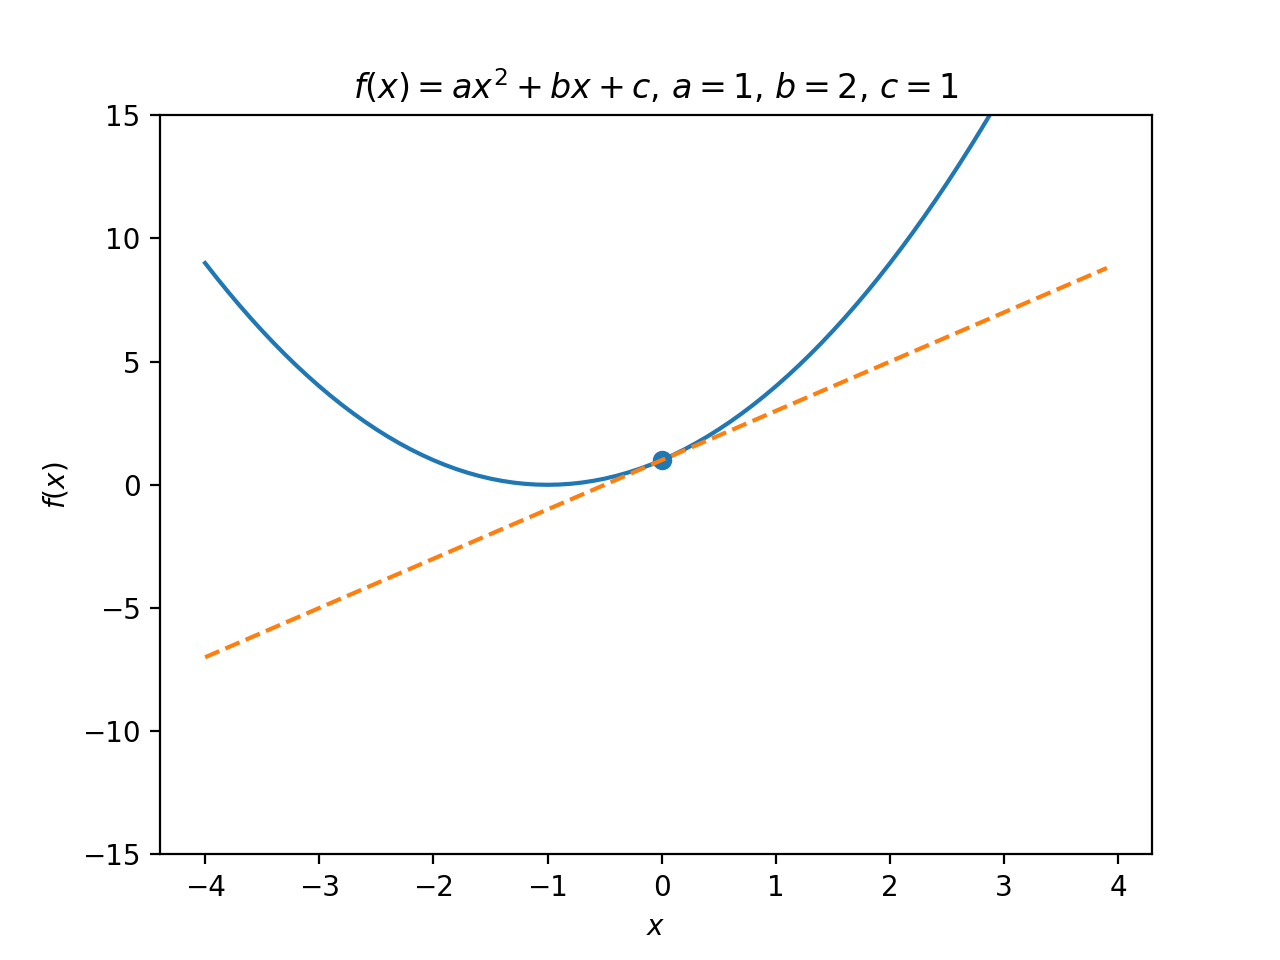

interactive(children=(IntSlider(value=1, description='a', max=3, min=-1), IntSlider(value=2, description='b', …

<function __main__.update>

In [47]:
x_min = -4
x_max = 4
dx = 0.1
x = np.arange(x_min, x_max, dx)

a=1
b=0.5
c=-1

x_tangent = 2                    # Where do we want the tangent line?
d_f = d_fnc(x_tangent, a, b)     # What is the slope at x_tangent?

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
line, = ax.plot(x, fnc(x,a,b,c))                                      # Plot the curve
tan_pt = ax.scatter([x_tangent], [fnc(x_tangent,a,b,c)])               # Mark the point where we are getting the tangent line
tan_line, = ax.plot(x, d_f*(x-x_tangent)+fnc(x_tangent,a,b,c), '--')      # Draw the tangent line through x_tangent

ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$f(x)$')
ax.set_title(r'$f(x)=ax^2+bx+c$, $a=$'+str(a)+r', $b=$'+str(b)+', $c=$'+str(c))
plt.ylim([-15,15])

def update(a,b,c,x_tangent):
    data = fnc(x,a,b,c)
    d_f = d_fnc(x_tangent, a, b)
    line.set_ydata(data)
    tan_pt.set_offsets([[x_tangent,fnc(x_tangent,a,b,c)]])
    #print(np.c_[x_tangent,fnc(x_tangent,a,b,c)])
    tan_line.set_ydata(d_f*(x-x_tangent)+fnc(x_tangent,a,b,c))
    ax.set_title(r'$f(x)=ax^2+bx+c$, $a=$'+str(a)+r', $b=$'+str(b)+', $c=$'+str(c))
    fig.canvas.draw()
    
interact(update, a=1, b=2, c=1, x_tangent=1)
